In [64]:
import numpy as np
import LogisticRegression
from LogisticRegression import gen_data
def accuracy(Y, prediction):
    assert len(Y) == len(prediction)
    acc = 0
    for i in range(len(Y)):
        if (prediction[i] > 0 and Y[i] == 1) or (prediction[i] < 0 and Y[i] == -1):
            acc += 1
    return acc/len(Y)
def kfold_cross_val(X, Y, fold = 5, algorithm = LogisticRegression, metric = accuracy):
    #fisher yates algorithm to shuffle dataset
    x = np.copy(X)
    y = np.copy(Y)
    for i in range(len(X)):
        j = np.random.randint(0, i+1)
        if j != i:
            x[i] = x[j]
            y[i] = y[j]
        x[j] = X[i]
        y[j] = Y[i]
    fold_size = len(X)//fold
    average = 0.0
    for f in range(0,fold):
        val_x = x[f*fold_size:(f+1)*fold_size]
        val_y = y[f*fold_size:(f+1)*fold_size]
        train_x = np.concatenate([x[:f*fold_size], x[(f+1)*fold_size:]], axis = 0)
        train_y = np.concatenate([y[:f*fold_size], y[(f+1)*fold_size:]], axis = 0)
        prediction = algorithm.predict(val_x,algorithm.SGD(train_x,train_y))
        average += metric(val_y, prediction)
    return average/fold

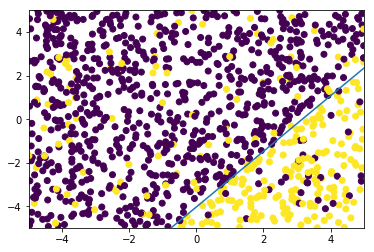

In [65]:
x, y, a, b = gen_data(1100)

In [68]:
kfold_cross_val(x,y)

0.8618181818181819